# Vehicle Routing Problem
## Initialization

In [1]:
import numpy as np
import utility

from full_qubo_solver import FullQuboSolver
from average_partition_solver import AveragePartitionSolver
from qiskit_native_solver import QiskitNativeSolver
from route_activation_solver import RouteActivationSolver
from clustered_tsp_solver import ClusteredTspSolver
from solution_partition_solver import SolutionPartitionSolver

In [2]:
n = 5
m = 2
seed = 1543

In [3]:
instance, xc, yc = utility.generate_vrp_instance(n, seed)

In [4]:
vrp1 = FullQuboSolver(n, m, instance)
vrp2 = AveragePartitionSolver(n, m, instance)
vrp3 = RouteActivationSolver(n, m, instance)
vrp4 = QiskitNativeSolver(n, m, instance)
vrp5 = ClusteredTspSolver(n, m, instance)
vrp6 = SolutionPartitionSolver(n, m, instance)

## Solve via Hybrid Solvers

In [5]:
vrp_list = [vrp1, vrp2, vrp3, vrp4, vrp5, vrp6]
for vrp in vrp_list:
    vrp.solve(solver='leap')

## Full Qubo Solver (FQS)

***Representation***

$x_{i,j,k} = 1$ if $i^{th}$ vehicle is in $j^{th}$ node at the $k^{th}$ timestep.

$$i \in \{1, 2, \dots M\}; \; j \in \{0, 1, \dots N\}; \; k \in \{1, 2, \dots N\}$$

***Objective Function***

$$C = \sum_{m=1}^M \sum_{n=1}^N C_{0,n} x_{m,n,1} + \sum_{m=1}^M \sum_{n=1}^N C_{n,0} x_{m,n,N} + \sum_{m=1}^M \sum_{n=1}^{N-1} \sum_{i=0}^{N} \sum_{j=0}^{N} C_{i,j} x_{m,i,n} x_{m,j,n+1}$$

Here, the first term represents the cost of moving from the depot to the first visited client for each vehicle, the second term represents the cost of moving from the last visited client to the depot for each vehicle, and the third term represents the costs at the intermediate nodes.

***Constraints***

 - Every node (other than the depot) is served by exactly one vehicle at exactly one time instant.

$$\sum_{i=1}^M \sum_{j=1}^N x_{i,k,j} = 1 \;\;\forall k$$

 - A vehicle can be at only one place at any given timestep.

$$\sum_{k=0}^N x_{i,k,j} = 1 \;\;\forall i, j$$

***Qubit Complexity***

 - No. of Logical Variables: $MN(N+1)$
 - Best Case: $N(N+1)$
 - Worst Case: $N^2(N+1)$

![](images/fqs_complexity.png)

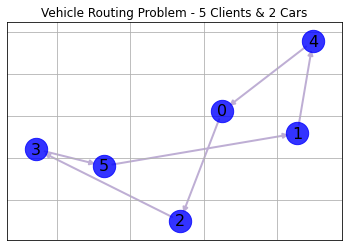

In [6]:
vrp1.visualize(xc, yc)

## Average Partitioning Solver (APS)

***Representation***

$x_{i,j,k} = 1$ if $i^{th}$ vehicle is in $j^{th}$ node at the $k^{th}$ timestep.

$$i \in \{1, 2, \dots M\}; \; j \in \{0, 1, \dots N\}; \; k \in \{1, 2, \dots T\}$$

The maximum timestep $T$ is evaluated as follows

$$T = \min\{N, \frac{N}{M} + L\}$$

Here, $L$ is a solver parameter called *Limit Radius* and naturally, we round up the above $T$ to the next integer.

***Objective Function***

$$C = \sum_{m=1}^M \sum_{n=1}^N C_{0,n} x_{m,n,1} + \sum_{m=1}^M \sum_{n=1}^N C_{n,0} x_{m,n,T} + \sum_{m=1}^M \sum_{n=1}^{T-1} \sum_{i=0}^{N} \sum_{j=0}^{N} C_{i,j} x_{m,i,n} x_{m,j,n+1}$$

Here, the first term represents the cost of moving from the depot to the first visited client for each vehicle, the second term represents the cost of moving from the last visited client to the depot for each vehicle, and the third term represents the costs at the intermediate nodes.

***Constraints***

 - Every node (other than the depot) is served by exactly one vehicle at exactly one time instant.

$$\sum_{i=1}^M \sum_{j=1}^T x_{i,k,j} = 1 \;\;\forall k$$

 - A vehicle can be at only one place at any given timestep.

$$\sum_{k=0}^N x_{i,k,j} = 1 \;\;\forall i, j$$

***Qubit Complexity***

 - No. of Logical Variables: $MT(N+1)$
 - Best Case: $N(N+1)$
 - Worst Case: $N^2(N+1)$

![](images/aps_complexity.png)

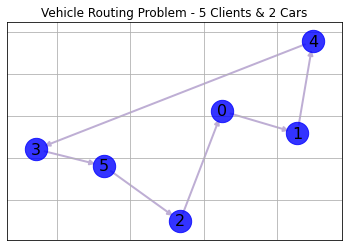

In [7]:
vrp2.visualize(xc, yc)

## Route Activation Solver (RAS)

***Representation***

$x_{i,j} = 1$ if the route from the $i^{th}$ node to the $j^{th}$ node is traversed by any vehicle at any time.

$$i \in \{0, 1, \dots N\}; \; j \in \{0, 1, \dots N\}; \; i \neq j$$

***Objective Function***

$$C = \sum_{i=0}^N \sum_{j=0}^N C_{i,j} x_{i,j}$$

***Constraints***

 - Each node (other than the depot) has exactly $1$ outgoing active edge and exactly $1$ incoming active edge.

$$\sum_{j\neq i,j=0}^N x_{i,j} = 1 \;\;\forall i$$
$$\sum_{i\neq j,i=0}^N x_{i,j} = 1 \;\;\forall j$$

 - The depot has exactly $M$ outgoing and $M$ incoming connections.

$$\sum_{j=1}^N x_{0,j} = M $$
$$\sum_{j=1}^N x_{j,0} = M $$

***Qubit Complexity***

 - No. of Logical Variables: $N(N+1)$
 - Best Case: $N(N+1)$
 - Worst Case: $N(N+1)$

![](images/ras_complexity.png)

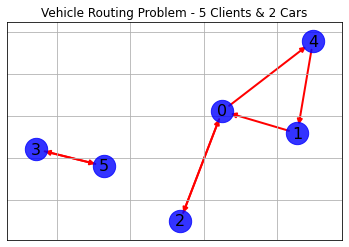

In [8]:
vrp3.visualize(xc, yc)

## Qiskit Native Solver (QNS)

***Representation***

$x_{i,j} = 1$ if the route from the $i^{th}$ node to the $j^{th}$ node is traversed by any vehicle at any time.

$$i \in \{0, 1, \dots N\}; \; j \in \{0, 1, \dots N\}; \; i \neq j$$

***Objective Function***

$$C = \sum_{i=0}^N \sum_{j=0}^N C_{i,j} x_{i,j}$$

***Constraints***

 - Each node (other than the depot) has exactly $1$ outgoing active edge and exactly $1$ incoming active edge.

$$\sum_{j\neq i,j=0}^N x_{i,j} = 1 \;\;\forall i$$
$$\sum_{i\neq j,i=0}^N x_{i,j} = 1 \;\;\forall j$$

 - The depot has exactly $M$ outgoing and $M$ incoming connections.

$$\sum_{j=1}^N x_{0,j} = M $$
$$\sum_{j=1}^N x_{j,0} = M $$

 - DFJ Constraints for subtour elimination. Basically consider every possible subtour loop and eliminate them individually. Very inefficient.

$$\sum_{i, j \in S, i \neq j} x_{i,j} \leq |S| - 1 \;\;\forall S$$

Here, $S$ represents a set of nodes excluding the depot that can form a loop and $|S|$ is the number of nodes in the loop $S$. The above constraint needs to be enforced for all possible loops $S$, which is what makes it so inefficient.

***Qubit Complexity***

 - No. of Logical Variables: $N(N+1)$
 - Best Case: $N(N+1)$
 - Worst Case: $N(N+1)$

![](images/qns_complexity.png)

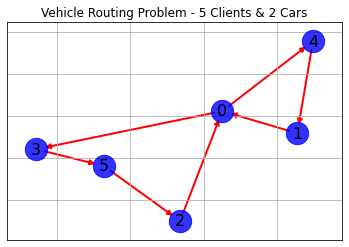

In [9]:
vrp4.visualize(xc, yc)

## Clustered Tsp Solver (CTS)

***Algorithm***

Use a multilevel maxcut with $M$ partitions to cluster the nodes into $M$ clsuters. Assign each cluster to a different vehicle and solve Travelling Salesman for each. Clustering is done using D-Wave's Leap Hybrid DQM Solvers. Below we show the formulation for TSP with $P$ nodes. This TSP is to be repeated for each cluster.

***Representation***

$x_{i,j} = 1$ if the salesman is at the $i^{th}$ node at the $j^{th}$ timestep.

$$i \in \{1, \dots P\}; \; j \in \{1, \dots P\}$$

***Objective Function***

$$C = \sum_{n=1}^P C_{0,n} x_{n,1} + \sum_{n=1}^P C_{n,0} x_{n,P} + \sum_{n=1}^{N-1} \sum_{i=1}^{N} \sum_{j=1}^{N} C_{i,j} x_{i,n} x_{j,n+1}$$

Here, the first term represents the cost of moving from the depot to the first visited client for each vehicle, the second term represents the cost of moving from the last visited client to the depot for each vehicle, and the third term represents the costs at the intermediate nodes.

***Constraints***

 - Every node is served at only one time.

$$\sum_{j=1}^P x_{i,j} = 1 \;\;\forall i$$

 - The vehicle can be at only one place at a given time

$$\sum_{i=1}^P x_{i,j} = 1 \;\;\forall j$$

***Qubit Complexity***

 - No. of Logical Variables: $MN + \frac{N^2}{M}$
 - Best Case: $2N\sqrt{N}$
 - Worst Case: $N(N+1)$

![](images/cts_complexity.png)

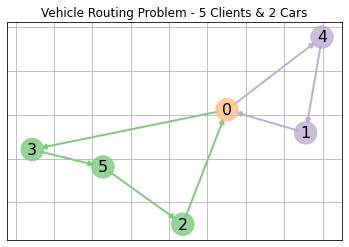

In [10]:
vrp5.visualize(xc, yc)

## Solution Partitioning Solver (SPS)

***Algorithm***

Assume a single vehicle and solve the TSP for the problem. Then cut the TSP solution at $M-1$ points to generate $M$ routes for $M$ vehicles. While selecting the cuts, out of a total possible $N-1$ choices, choose the $M-1$ cuts that would minimize the extra cost incurred. Below, we outline the TSP formulation used.

***Representation***

$x_{i,j} = 1$ if the salesman is at the $i^{th}$ node at the $j^{th}$ timestep.

$$i \in \{1, \dots P\}; \; j \in \{1, \dots P\}$$

***Objective Function***

$$C = \sum_{n=1}^P C_{0,n} x_{n,1} + \sum_{n=1}^P C_{n,0} x_{n,P} + \sum_{n=1}^{N-1} \sum_{i=1}^{N} \sum_{j=1}^{N} C_{i,j} x_{i,n} x_{j,n+1}$$

Here, the first term represents the cost of moving from the depot to the first visited client for each vehicle, the second term represents the cost of moving from the last visited client to the depot for each vehicle, and the third term represents the costs at the intermediate nodes.

***Constraints***

 - Every node is served at only one time.

$$\sum_{j=1}^P x_{i,j} = 1 \;\;\forall i$$

 - The vehicle can be at only one place at a given time

$$\sum_{i=1}^P x_{i,j} = 1 \;\;\forall j$$

***Qubit Complexity***

 - No. of Logical Variables: $N^2$
 - Best Case: $N^2$
 - Worst Case: $N^2$

![](images/sps_complexity.png)

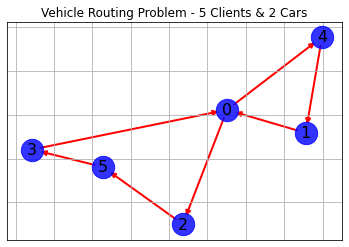

In [11]:
vrp6.visualize(xc, yc)

## Cost Comparison

In [12]:
solver_types = ['FQS', 'APS', 'RAS', 'QNS', 'CTS', 'SPS']
for i, vrp in enumerate(vrp_list):
    print(f'{solver_types[i]} - Optimized Cost: {vrp.evaluate_vrp_cost()}')

FQS - Optimized Cost: 16.700734116893727
APS - Optimized Cost: 16.684864976268727
RAS - Optimized Cost: 13.045056748396291
QNS - Optimized Cost: 16.732882384501863
CTS - Optimized Cost: 16.732500478290717
SPS - Optimized Cost: 16.732536088927


## QUBO Build Times

In [13]:
qubo_time = [vrp.timing['qubo_build_time'] for vrp in vrp_list]
for i in range(len(vrp_list)):
    print(f'{solver_types[i]} - Classical QUBO Build Time: {qubo_time[i]} us')

FQS - Classical QUBO Build Time: 240815.8779144287 us
APS - Classical QUBO Build Time: 229962.58735656738 us
RAS - Classical QUBO Build Time: 65454.959869384766 us
QNS - Classical QUBO Build Time: 291357.75566101074 us
CTS - Classical QUBO Build Time: 40393.829345703125 us
SPS - Classical QUBO Build Time: 79755.30624389648 us


## D-Wave QPU Access Times

In [14]:
qpu_time = [vrp.timing['qpu_access_time'] for vrp in vrp_list]
qpu_time[4] += vrp5.timing['clustering_time']['qpu_access_time']
for i in range(len(vrp_list)):
    print(f'{solver_types[i]} - QPU Access Time: {qpu_time[i]} us')

FQS - QPU Access Time: 72094 us
APS - QPU Access Time: 71842 us
RAS - QPU Access Time: 102019 us
QNS - QPU Access Time: 77144 us
CTS - QPU Access Time: 250988 us
SPS - QPU Access Time: 96748 us


## Qubit Complexity

| Solver | Best Case Complexity | Worst Case Complexity |
| :-: | :-: | :-: |
| ***FQS*** | $N(N + 1)$ | $N^2(N + 1)$ |
| ***APS*** | $N(N + 1)$ | $N^2(N + 1)$ |
| ***RAS*** | $N(N + 1)$ | $N(N + 1)$ |
| ***QNS*** | $N(N + 1)$ | $N(N + 1)$ |
| ***CTS*** | $2N\sqrt{N}$ | $N(N + 1)$ |
| ***SPS*** | $N^2$ | $N^2$ |

![](images/qubit_complexity.png)